In [49]:
import pandas as pd
from fastai.tabular import *

In [50]:
test_df = pd.read_csv('Data/test.csv')
train_df = pd.read_csv('Data/train.csv')

In [51]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
train_df.Age.median()

28.0

In [53]:
all_df = pd.concat([train_df, test_df], sort=False)

In [54]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
all_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [56]:
train_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [57]:
train_df['Name'].str.split(',').str[1].head()

0                                Mr. Owen Harris
1     Mrs. John Bradley (Florence Briggs Thayer)
2                                    Miss. Laina
3             Mrs. Jacques Heath (Lily May Peel)
4                              Mr. William Henry
Name: Name, dtype: object

In [58]:
train_df['Name'].str.split(',').str[1].str.split('.').str[0].head(8)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
Name: Name, dtype: object

In [59]:
train_df['Title'] = train_df['Name'].str.split(',').str[1].str.split('.').str[0]

In [60]:
train_df = train_df.drop(['Name'], axis=1)

In [61]:
train_df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr


In [62]:
train_df[['Title','Survived']].groupby(['Title']).count().sort_values(by='Survived', ascending=False)

,Survived
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Major,2
Col,2
Mlle,2


In [63]:
test_df = pd.read_csv('Data/test.csv')
train_df = pd.read_csv('Data/train.csv')

In [64]:
for df in [train_df, test_df]:
    df['Title'] = df['Name'].str.split(',').str[1].str.split(' ').str[1]
    df['Deck'] = df['Cabin'].str[0]

In [65]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,C


In [66]:
all_df = pd.concat([train_df, test_df])
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,NaN


In [67]:
all_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr.,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona.,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr.,NaN
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Master.,NaN


In [68]:
all_df[['Title', 'Age']].groupby(['Title'], as_index=False).mean()

,Title,Age
0,Capt.,70.000000
1,Col.,54.000000
2,Don.,40.000000
3,Dona.,39.000000
4,Dr.,43.571429
5,Jonkheer.,38.000000
6,Lady.,48.000000
7,Major.,48.500000
8,Master.,5.482642
9,Miss.,21.774238


In [69]:
mean_age_by_title = all_df[['Title', 'Age']].groupby(['Title'], as_index=False).mean()

In [70]:
all_df['Age'].isna().sum()

263

In [71]:
mean_age_by_title = all_df.groupby('Title').mean()['Age']

In [72]:
for df in [train_df, test_df]:
    for title, age in mean_age_by_title.iteritems():
        df.loc[df['Age'].isnull() & (df['Title'] == title), 'Age'] = age

In [73]:
train_df['Age'].isna().sum()

0

In [74]:
test_df['Age'].isna().sum()

0

In [75]:
test_df['Fare'] = test_df['Fare'].fillna(0)

In [76]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.,NaN


In [77]:
test_df['Fare'].isna().sum()

0

In [78]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,C
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr.,NaN
5,6,0,3,"Moran, Mr. James",male,32.252151,0,0,330877,8.4583,NaN,Q,Mr.,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Mr.,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Master.,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Mrs.,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,Mrs.,NaN


In [79]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.,NaN
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr.,NaN
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss.,NaN
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr.,NaN
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Mrs.,NaN
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr.,NaN


### Fastai setup

In [32]:
np.random.seed(42)

## newbie

In [33]:
dep_var = 'Survived'
cat_names = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck']
cont_names = ['Age', 'Fare', 'SibSp', 'Parch']
procs = [FillMissing, Categorify, Normalize]

In [34]:
test = TabularList.from_df(test_df, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [35]:
data = (TabularList.from_df(train_df, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                           #.split_by_rand_pct(valid_pct=0.2)
                           .split_by_idx(list(range(0,200)))
                           #.split_by_idx(valid_idx=range(200,400))
                           .label_from_df(cols=dep_var)
                           .add_test(test, label=0)
                           .databunch())

In [36]:
learn = tabular_learner(data, layers=[300, 150], metrics=accuracy, emb_drop=0.1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


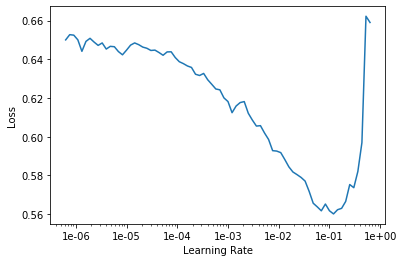

In [37]:
learn.lr_find()
learn.recorder.plot()

In [38]:
learn.fit(15, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.733318,0.583140,0.700000,00:25
1,0.603928,0.465766,0.775000,00:25
2,0.529878,0.435802,0.815000,00:25
3,0.485314,0.427076,0.790000,00:25
4,0.460643,0.435597,0.825000,00:25
5,0.451741,0.431344,0.825000,00:25
6,0.437972,0.403380,0.825000,00:25
7,0.430724,0.492438,0.810000,00:25
8,0.423753,0.493072,0.815000,00:25
9,0.418297,0.452708,0.845000,00:25


In [39]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)
pred_prob, pred_class = preds.max(1)

submission = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':pred_class})
submission.to_csv('titanic-solution-fastai-newbie.csv', index=False)

## Pro

In [40]:
dep_var = 'Survived'
cat_names = ['Sex', 'Embarked', 'Title', 'Deck','Pclass','SibSp', 'Parch']
cont_names = [ 'Age', 'Fare']
procs = [FillMissing, Categorify, Normalize]

In [41]:
# from guide
data = (TabularList.from_df(train_df, procs=procs, cont_names=cont_names, cat_names=cat_names)
        .split_by_idx(valid_idx=range(int(len(train_df)*0.9),len(train_df)))
        .label_from_df(cols=dep_var)
        .add_test(TabularList.from_df(test_df, cat_names=cat_names, cont_names=cont_names, procs=procs))
        .databunch())

In [42]:
learn = tabular_learner(data, layers=[1000,500], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


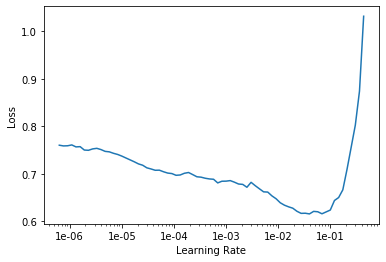

In [43]:
learn.lr_find()
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(5, 2.5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.837559,0.587342,0.755556,00:25
1,0.679667,0.480536,0.788889,00:25
2,0.606094,0.404768,0.833333,00:25
3,0.535879,0.358509,0.844444,00:25
4,0.490667,0.328666,0.833333,00:25


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


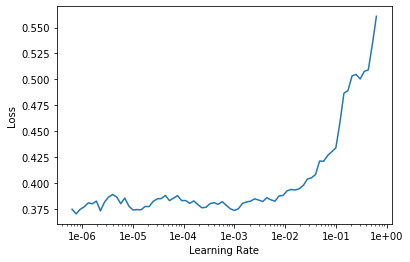

In [45]:
learn.lr_find()
learn.recorder.plot()

In [46]:
learn.unfreeze()
learn.fit_one_cycle(15, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.381660,0.325932,0.844444,00:25
1,0.380357,0.328173,0.855556,00:25
2,0.377601,0.323049,0.844444,00:25
3,0.373080,0.339506,0.833333,00:25
4,0.375132,0.325138,0.855556,00:25
5,0.374130,0.349564,0.833333,00:25
6,0.370862,0.335813,0.844444,00:25
7,0.370562,0.334454,0.833333,00:25
8,0.368879,0.333044,0.833333,00:25
9,0.360701,0.344931,0.866667,00:25


In [47]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)
pred_prob, pred_class = preds.max(1)

submission = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':pred_class})
submission.to_csv('titanic-solution-fastai-pro.csv', index=False)